In [38]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [39]:
path = os.getcwd()
files = os.listdir(path)
filesxlsx = [f for f in files if f[-4:] == 'xlsx']
filesxlsx

['Rabi2-13-2025-13-8.xlsx',
 'Rabi2-13-2025-13-3.xlsx',
 'Rabi2-13-2025-12-57.xlsx',
 'Rabi2-13-2025-13-13.xlsx']

In [40]:
path=filesxlsx[-1]
df = pd.read_excel(path, sheet_name=None)
        
y_data = df['data'].y
x_data = df['data'].x

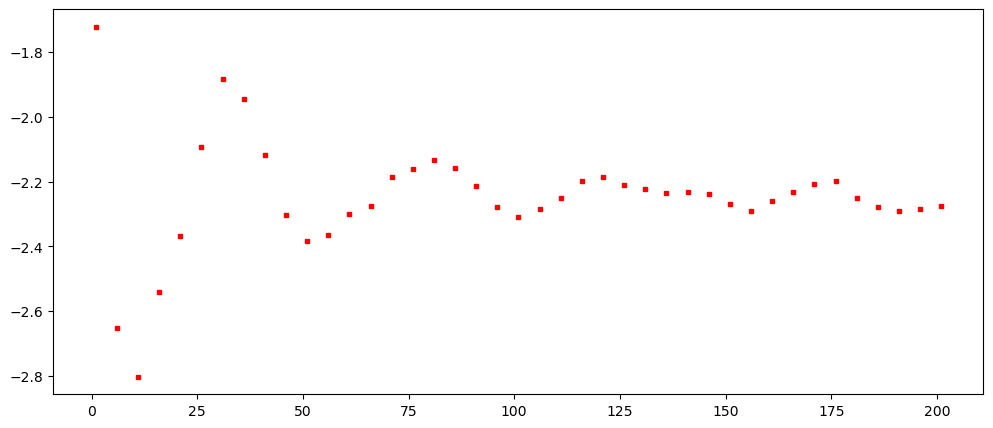

In [41]:
plt.figure(figsize=(12,5))

plt.plot(x_data, y_data, marker='s', mfc='red',
         mec='red', ls="None", ms=3)

In [42]:
def fit(t, A, B, C, D, p, q, beta, O):
    return A*np.exp(-p*t)+np.exp(-q*t)*(B*np.cos(O*t) + C*np.exp(-beta*t)*np.sin(O*t) + D)
vectorfit = np.vectorize(fit)

In [43]:
parameters, covariance = scipy.optimize.curve_fit(vectorfit, x_data, y_data, p0 = [1,1,1,-2,0.1,0.1,0.1,0.1])
parameters, covariance = scipy.optimize.curve_fit(vectorfit, x_data, y_data, p0 = parameters)

/tmp/ipykernel_27410/519325599.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-p*t)+np.exp(-q*t)*(B*np.cos(O*t) + C*np.exp(-beta*t)*np.sin(O*t) + D)


In [44]:
A, B, C, D, p, q, beta, O = parameters
x_fit = np.arange(np.array(x_data)[0],np.array(x_data)[-1],0.1)
y_fit = fit(x_fit, A, B, C, D, p, q, beta, O)

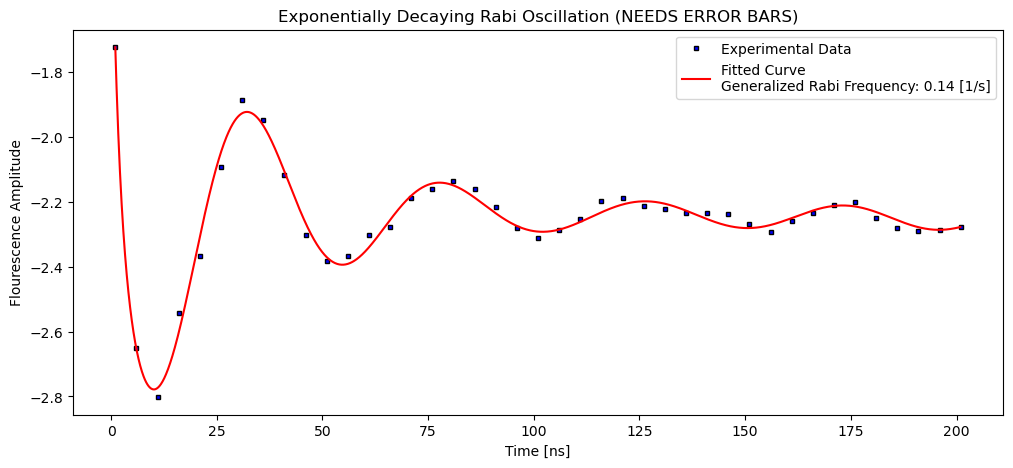

In [46]:
plt.figure(figsize=(12,5))

plt.plot(x_data, y_data, marker='s', mfc='blue',
         mec='black', ls="None", ms=3, label = 'Experimental Data')
plt.plot(x_fit, y_fit, 'red', label = 'Fitted Curve\nGeneralized Rabi Frequency: '+str(np.round(O,2))+' [1/s]')
plt.xlabel("Time [ns]")
plt.ylabel("Flourescence Amplitude")
plt.title("Exponentially Decaying Rabi Oscillation (NEEDS ERROR BARS)")
plt.legend()